This is a sample workflow for applying SAS Machine learning algorithms through python

Required input files- 

- A data set containing one Employee per row and different features.
- A TARGET variable named 'Turnover'

Required packages-

- SWAT for connecting to CAS
- Pandas, Matplotlib 
- Scikit learn (Optional if you also want to test  Python model)
- sasctl for registering models into model manager


## Import Necessary Packages

In [25]:
import swat
import matplotlib.pyplot as plt
import pandas as pd
import os
#package required for python models
from sklearn.model_selection import train_test_split 
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
os.environ['CAS_CLIENT_SSL_CA_LIST']='/opt/anaconda3/my_CAS_Viya4_cert.pem'

## Connect to CAS and Check Server Status

Provide username and password

In [28]:
import getpass
print('Username:')
username = getpass.getpass()
print('Password:')
paswd=getpass.getpass()


Username:
········
Password:
········


In [29]:
conn=swat.CAS('mipistcas.eastus.cloudapp.azure.com',5570,username=username,password=paswd)

In [30]:
 out = conn.serverstatus()

NOTE: Grid node action status report: 1 nodes, 9 total actions executed.


## See available tables in CASLIB


In [31]:
conn.caslibinfo()

,Name,Type,Description,Path,Definition,Subdirs,Local,Active,Personal,Hidden,Transient
0,CASUSER(sahaqu),PATH,Personal File System Caslib,/cas/data/caslibs/casuserlibraries/sahaqu/,,1.0,0.0,1.0,1.0,0.0,1.0
1,Formats,PATH,Stores user defined formats.,/cas/data/caslibs/formats/,,0.0,0.0,0.0,0.0,0.0,0.0
2,HR_Dataset,PATH,,/cas/data/caslibs/hr_dataset/,,0.0,0.0,0.0,0.0,0.0,0.0
3,ModelPerformanceData,PATH,Stores performance data output for the Model M...,/cas/data/caslibs/modelMonitorLibrary/,,0.0,0.0,0.0,0.0,0.0,0.0
4,Models,PATH,Stores models created by Visual Analytics for ...,/cas/data/caslibs/models/,,0.0,0.0,0.0,0.0,0.0,0.0
5,Public,PATH,"Shared and writeable caslib, accessible to all...",/cas/data/caslibs/public/,,0.0,0.0,0.0,0.0,0.0,0.0
6,Samples,PATH,"Stores sample data, supplied by SAS.",/cas/data/caslibs/samples/,,0.0,0.0,0.0,0.0,0.0,0.0
7,SystemData,PATH,"Stores application generated data, used for ge...",/cas/data/caslibs/sysData/,,0.0,0.0,0.0,0.0,0.0,0.0


In [32]:
currentCaslib= 'PUBLIC' #name of the caslib 
conn.tableinfo(caslib=currentCaslib)

,Name,Rows,Columns,IndexedColumns,Encoding,CreateTimeFormatted,ModTimeFormatted,AccessTimeFormatted,JavaCharSet,CreateTime,...,Repeated,View,MultiPart,SourceName,SourceCaslib,Compressed,Creator,Modifier,SourceModTimeFormatted,SourceModTime
0,SSA_INDEED_COMBINED,23122,19,0,utf-8,2021-10-26T15:20:13-04:00,2021-10-26T15:20:18-04:00,2021-11-01T09:34:15-04:00,UTF8,1.950895e+09,...,0,0,0,SSA_INDEED_COMBINED.sashdat,Public,0,sahaqu,,2021-10-26T15:20:13-04:00,1.950895e+09
1,ACCESSIONS2011_2017,1609603,22,0,utf-8,2021-10-26T15:22:04-04:00,2021-10-26T15:22:10-04:00,2021-10-27T20:40:10-04:00,UTF8,1.950895e+09,...,0,0,0,ACCESSIONS2011_2017.sashdat,Public,0,sahaqu,,2021-10-26T15:22:03-04:00,1.950895e+09
2,DMV_CBSA_DEMOGRAPHICS_FULL,4750,83,0,utf-8,2021-10-26T15:31:10-04:00,2021-10-26T15:31:10-04:00,2021-11-01T08:27:48-04:00,UTF8,1.950896e+09,...,0,0,0,DMV_CBSA_DEMOGRAPHICS_FULL.sashdat,Public,0,sahaqu,,2021-10-26T15:31:10-04:00,1.950896e+09
3,SEPARATIONS2011_2017,1565674,22,0,utf-8,2021-10-26T15:33:47-04:00,2021-10-26T15:33:52-04:00,2021-10-27T05:50:33-04:00,UTF8,1.950896e+09,...,0,0,0,SEPARATIONS2011_2017.sashdat,Public,0,sahaqu,,2021-10-26T15:33:46-04:00,1.950896e+09
4,OPM_POSITIONS_ENHANCED,2360972,90,0,utf-8,2021-10-26T16:47:10-04:00,2021-10-26T16:47:16-04:00,2021-10-29T06:53:40-04:00,UTF8,1.950900e+09,...,0,0,0,OPM_POSITIONS_ENHANCED.sashdat,Public,0,sasadm,,2021-10-26T16:31:26-04:00,1.950899e+09
5,GEO_CBSA,10985,17,0,utf-8,2021-10-26T17:16:25-04:00,2021-10-26T17:16:26-04:00,2021-11-01T08:27:53-04:00,UTF8,1.950902e+09,...,0,0,0,GEO_CBSA.sashdat,Public,0,sahaqu,,2021-10-26T17:16:25-04:00,1.950902e+09
6,ENHANCEDEMPLOYMENT2018_NEW,2100812,41,0,utf-8,2021-10-26T22:37:03-04:00,2021-10-26T22:39:36-04:00,2021-10-27T20:46:38-04:00,UTF8,1.950921e+09,...,0,0,0,,,0,sahaqu,,,NaN
7,OPM_POSITIONS_ENHANCED_NEW,2360972,91,0,utf-8,2021-10-26T22:59:32-04:00,2021-10-26T23:00:24-04:00,2021-11-01T08:44:48-04:00,UTF8,1.950923e+09,...,0,0,0,,,0,sahaqu,,,NaN
8,ACC_SEP,459228,26,0,utf-8,2021-10-27T06:47:47-04:00,2021-10-27T06:50:12-04:00,2021-11-01T08:27:47-04:00,UTF8,1.950951e+09,...,0,0,0,,,0,sahaqu,,,NaN
9,EMPLOYEE_ATTRITION_NEW,234111,41,0,utf-8,2021-10-27T06:52:33-04:00,2021-10-27T06:54:20-04:00,2021-10-29T13:41:26-04:00,UTF8,1.950951e+09,...,0,0,0,,,0,sahaqu,,,NaN


In [33]:
castbl=conn.CASTable('ML_DATA_NOFMT',caslib=currentCaslib)

In [34]:
castbl.head()#display 5 rows from the castbl

,Attrition,Employee_ID,Average Training Hours,Average Job Satisfaction,Salary Delta,Comparable Private Sector Salary,Fully Loaded Cost,Performance Rating,Local Unemployment Rate,Retirement Eligible,...,Agency Type,Education Level Type,Location Type,LOS Level,Occupation Type,Work Schedule Type,STEM Occupation Aggregate,STEM Occupation Type,Work Status,Turnover
0,0,825707.0,48.0,1.0,0.144400,34156.900333,39099.57,3.0,0.039224,0,...,Cabinet Level Agencies,HIGH SCHOOL OR EQUIVALENCY,United States,3 - 4 years,White Collar,Not Full-time,ALL OTHER OCCUPATIONS,ALL OTHER OCCUPATIONS,Other Employees,0.0
1,0,825807.0,28.0,4.0,0.125653,35836.276490,41705.16,3.0,0.026192,1,...,Cabinet Level Agencies,BELOW HIGH SCHOOL,United States,3 - 4 years,White Collar,Not Full-time,ALL OTHER OCCUPATIONS,ALL OTHER OCCUPATIONS,Other Employees,0.0
2,0,825907.0,29.0,3.0,0.099907,31192.272936,37150.29,2.0,0.040970,1,...,Cabinet Level Agencies,BACHELORS,United States,3 - 4 years,White Collar,Not Full-time,ALL OTHER OCCUPATIONS,ALL OTHER OCCUPATIONS,Other Employees,0.0
3,0,826007.0,49.0,3.0,0.062670,38058.458010,46916.34,3.0,0.054189,0,...,Cabinet Level Agencies,HIGH SCHOOL OR EQUIVALENCY,United States,10 - 14 years,White Collar,Not Full-time,ALL OTHER OCCUPATIONS,ALL OTHER OCCUPATIONS,Other Employees,0.0
4,0,826107.0,35.0,1.0,0.050921,82478.419825,102811.42,2.0,0.048937,0,...,Cabinet Level Agencies,DOCTORATE,United States,Less than 1 year,White Collar,Full-time,ALL OTHER OCCUPATIONS,ALL OTHER OCCUPATIONS,Other Employees,0.0


CAS is an action based language we are now loading actionsets for decision tree and sampling

In [35]:
conn.loadactionset('decisionTree')
conn.loadActionSet('sampling')


NOTE: Added action set 'decisionTree'.
NOTE: Added action set 'sampling'.


[actionset]

 'sampling'

+ Elapsed: 0.00323s, user: 0.00201s, sys: 0.00117s, mem: 0.246mb

Creating test train parition indicator and storing the new table in active caslib

In [36]:
conn.sampling.srs(
     table = {"name":"ML_DATA_NOFMT","caslib":currentCaslib},
     samppct = 80,
     partind = True,
     output = dict(casout = dict(name = 'ML_DATA_PART', replace = True), copyVars = 'ALL')
)

NOTE: Simple Random Sampling is in effect.
NOTE: Using SEED=1696197410 for sampling.


[SRSFreq]

 Frequencies
 
      NObs   NSamp
 0  234111  187289

[OutputCasTables]

             casLib          Name Label    Rows  Columns                                           casTable
 0  CASUSER(sahaqu)  ML_DATA_PART        234111       44  CASTable('ML_DATA_PART', caslib='CASUSER(sahaq...

+ Elapsed: 0.358s, user: 1.65s, sys: 0.411s, mem: 146mb

Now point castbl object to the prtitioned table

In [37]:
castbl=conn.CASTable('ML_DATA_PART')

CASTable mimics pandas dataframe functionalities

In [38]:
castbl['_PartInd_'].value_counts()

1.0    187289
0.0     46822
dtype: int64

Now we will use the partitioned table (ML_DATA_PART) to develop ML model. SWAT APIs for SAS ML models requires table name, input variable name, target variable name, and additional parameters specific to models

- We will create a list of the input variables
- We will identfiy the nominal variables
- we will define training and validation table as dictionary object

In [39]:
trainTable=dict(name = 'ML_DATA_PART', caslib='CASUSER',where = '_PartInd_ = 1') 
#caslib is optional if it is your active caslib

In [40]:
validTable=dict(name = 'ML_DATA_PART', caslib='CASUSER',where = '_PartInd_ = 0')

## Extract input column names for ML model

In [41]:
columns=conn.table.columnInfo(table="ML_DATA_PART")

In [42]:
colnames=columns["ColumnInfo"]["Column"]

In [43]:
colnames

0                            Attrition
1                          Employee_ID
2               Average Training Hours
3             Average Job Satisfaction
4                         Salary Delta
5     Comparable Private Sector Salary
6                    Fully Loaded Cost
7                   Performance Rating
8              Local Unemployment Rate
9                  Retirement Eligible
10         Awards - Average Num / Year
11             Awards - Total Received
12              Awards - Average Value
13                Turnover Probability
14                  Manager Complaints
15                    Churn Propensity
16                              salary
17                                 LOS
18                           Age Level
19                          Occupation
20                              Agency
21                          Sub Agency
22                            Location
23                     Education level
24                   Occupation Family
25                     ST

We discard TARGET and _PartInd_ from input variable list

In [44]:
input_vars=list(colnames[2:13])

In [45]:
input_vars

['Average Training Hours',
 'Average Job Satisfaction',
 'Salary Delta',
 'Comparable Private Sector Salary',
 'Fully Loaded Cost',
 'Performance Rating',
 'Local Unemployment Rate',
 'Retirement Eligible',
 'Awards - Average Num / Year',
 'Awards - Total Received',
 'Awards - Average Value']

Now we are ready to train our model. We will use a gradient boosting algorithm

In [51]:
gboost_result=conn.decisionTree.gbtreeTrain(
     table = trainTable, #table to train on
     target = 'Turnover',   
     inputs = input_vars,  
     nominals = ['Performance Rating','Retirement Eligible','Turnover'], 
     casOut = dict(name = 'ML_Part_gdboost', replace = True), #save trained  scoring code
    nTree=250,
    seed=123,
    maxLevel=3,
    learningRate=0.1,
    saveState={'name':'gb_HR_ML','replace':True} #save  analytic store object   
    
)

NOTE: 1232011 bytes were written to the table "gb_HR_ML" in the caslib "CASUSER(sahaqu)".


In [52]:
conn.table.promote(name='ML_Part_gdboost',target='gdboost_score_code',targetLib='PUBLIC')

ERROR: The target table gdboost_score_code of the promotion already exists. Please specify a different name.
ERROR: The action stopped due to errors.


+ Elapsed: 0.00168s, sys: 0.00159s, mem: 0.327mb

In [53]:
gboost_result

,Descr,Value
0,Number of Trees,250.000
1,Distribution,2.000
2,Learning Rate,0.100
3,Subsampling Rate,0.500
4,Number of Selected Variables (M),11.000
5,Number of Bins,50.000
6,Number of Variables,11.000
7,Max Number of Tree Nodes,7.000
8,Min Number of Tree Nodes,5.000
9,Max Number of Branches,2.000


Now we will do a quick comparsion between training and valdaition error

In [54]:
training_results_gdboost= conn.decisionTree.gbtreeScore(table=trainTable,model='ML_Part_gdboost')

In [55]:
training_results_gdboost["ScoreInfo"]

,Descr,Value
0,Number of Observations Read,187289
1,Number of Observations Used,187289
2,Misclassification Error (%),3.7044353913


In [57]:
validation_results_gdboost=NSCLC_gdboost_score = conn.decisionTree.gbtreeScore(
     table = dict(name = 'ML_DATA_PART', where = '_PartInd_ = 0'),
     model = 'ML_Part_gdboost',
     casout = dict(name='ML_Part_gdboost_score', replace = True),
     copyVars = 'Turnover',
     encodename = True,
  )

In [58]:
validation_results_gdboost["ScoreInfo"]

,Descr,Value
0,Number of Observations Read,46822
1,Number of Observations Used,46822
2,Misclassification Error (%),3.709794541


In [92]:
scoretbl=conn.CASTable('ML_Part_gdboost_score')
scoretbl.head()

,Turnover,I_Turnover,_MissIt_,P_Turnover1,P_Turnover0
0,0.0,0,0.0,0.005173,0.994827
1,0.0,0,0.0,0.009207,0.990793
2,0.0,0,0.0,0.008591,0.991409
3,0.0,0,0.0,0.002898,0.997102
4,0.0,0,0.0,0.000595,0.999405


In [93]:
target='TURNOVER'
assess_input='P_' + target +'1'
gb_assess_obj=conn.percentile.assess(table='ML_Part_gdboost_score',inputs=assess_input,
                                          casout=dict(name='gdboost_assess',replace=True),response=target,event='1')

gb_ROC=conn.CASTable(name='gdboost_assess_ROC')
gb_ROC=gb_ROC.to_frame()
gb_ROC.head()

,_Column_,_Event_,_Cutoff_,_TP_,_FP_,_FN_,_TN_,_Sensitivity_,_Specificity_,_KS_,...,_FPR_,_ACC_,_FDR_,_F1_,_C_,_GINI_,_GAMMA_,_TAU_,_MiscEvent_,_FNR_
0,P_Turnover1,1,0.00,1717.0,45105.0,0.0,0.0,1.000000,0.000000,0.0,...,1.000000,0.036671,0.963329,0.070747,0.905617,0.811234,0.831876,0.057317,0.963329,0.000000
1,P_Turnover1,1,0.01,1682.0,18383.0,35.0,26722.0,0.979616,0.592440,0.0,...,0.407560,0.606638,0.916172,0.154439,0.905617,0.811234,0.831876,0.057317,0.393362,0.020384
2,P_Turnover1,1,0.02,1637.0,13668.0,80.0,31437.0,0.953407,0.696974,0.0,...,0.303026,0.706377,0.893041,0.192339,0.905617,0.811234,0.831876,0.057317,0.293623,0.046593
3,P_Turnover1,1,0.03,1586.0,11504.0,131.0,33601.0,0.923704,0.744951,0.0,...,0.255049,0.751506,0.878839,0.214223,0.905617,0.811234,0.831876,0.057317,0.248494,0.076296
4,P_Turnover1,1,0.04,1531.0,10014.0,186.0,35091.0,0.891672,0.777985,0.0,...,0.222015,0.782154,0.867388,0.230885,0.905617,0.811234,0.831876,0.057317,0.217846,0.108328


Text(0, 0.5, 'True Positive Rate')

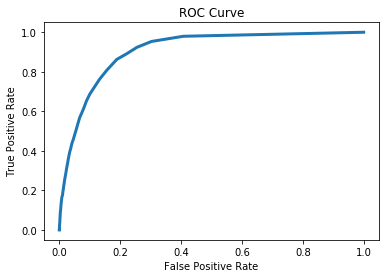

In [94]:
plt.plot(gb_ROC['_FPR_'],gb_ROC['_Sensitivity_'],linewidth=3, label='Gradient Boosting')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

In [59]:
conn.close()